In [1]:
import torch
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid") # agrega un nuevo tema, para los graficos por defecto

In [2]:
df = pd.read_csv('dataset/limpio.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,grupo 0,grupo 1
0,15.0,8,350.0,165.0,3693.0,11.5,1,1,0
1,18.0,8,318.0,150.0,3436.0,11.0,1,1,0
2,16.0,8,304.0,150.0,3433.0,12.0,1,1,0
3,17.0,8,302.0,140.0,3449.0,10.5,1,1,0
4,15.0,8,429.0,198.0,4341.0,10.0,1,1,0
...,...,...,...,...,...,...,...,...,...
386,27.0,4,140.0,86.0,2790.0,15.6,1,0,0
387,44.0,4,97.0,52.0,2130.0,24.6,2,0,0
388,32.0,4,135.0,84.0,2295.0,11.6,1,0,0
389,28.0,4,120.0,79.0,2625.0,18.6,1,0,0


In [4]:
X = pd.concat([df.iloc[:, :6], df.iloc[:, 7:]], axis=1)
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,grupo 0,grupo 1
0,15.0,8,350.0,165.0,3693.0,11.5,1,0
1,18.0,8,318.0,150.0,3436.0,11.0,1,0
2,16.0,8,304.0,150.0,3433.0,12.0,1,0
3,17.0,8,302.0,140.0,3449.0,10.5,1,0
4,15.0,8,429.0,198.0,4341.0,10.0,1,0
...,...,...,...,...,...,...,...,...
386,27.0,4,140.0,86.0,2790.0,15.6,0,0
387,44.0,4,97.0,52.0,2130.0,24.6,0,0
388,32.0,4,135.0,84.0,2295.0,11.6,0,0
389,28.0,4,120.0,79.0,2625.0,18.6,0,0


In [5]:
y = df['origin']
y

0      1
1      1
2      1
3      1
4      1
      ..
386    1
387    2
388    1
389    1
390    1
Name: origin, Length: 391, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state= 1)
print('X_train: ', type('X_train'))
X_train.head(5)

X_train:  <class 'str'>


,mpg,cylinders,displacement,horsepower,weight,acceleration,grupo 0,grupo 1
341,32.3,4,97.0,67.0,2065.0,17.8,0,0
277,21.5,6,231.0,115.0,3245.0,15.4,0,1
387,44.0,4,97.0,52.0,2130.0,24.6,0,0
11,15.0,8,400.0,150.0,3761.0,9.5,1,0
170,24.0,4,119.0,97.0,2545.0,17.0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_stad = sc.fit_transform(X_train.iloc[:, :6]) 
X_test_stad = sc.transform(X_test.iloc[:, :6]) 
print('X_train_stad: ', type('X_train_stad'))

X_train_stad = np.concatenate([X_train_stad, X_train.iloc[:, 7:].values], axis=1)
X_test_stad = np.concatenate([X_test_stad, X_test.iloc[:, 7:].values], axis=1)



X_train_stad:  <class 'str'>


In [8]:
X_train_stad.shape

(312, 7)

In [9]:
# no se porque tuve que hacer esto
y_test = np.array(y_test)

In [10]:
X_train_stad = torch.as_tensor(X_train_stad, dtype=torch.float32)
X_test_stad = torch.as_tensor(X_test_stad, dtype=torch.float32)
y_train = torch.as_tensor(y_train, dtype=torch.int64)
y_test = torch.as_tensor(y_test, dtype=torch.int64)

In [11]:
X_train_stad.shape

torch.Size([312, 7])

In [12]:
y_train.shape

torch.Size([312])

In [13]:
y_train = y_train -1
y_train

tensor([2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0,
        2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0,
        0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1,
        0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2,
        2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
        2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [14]:
from torch.utils.data import TensorDataset

train = TensorDataset(X_train_stad, y_train)

In [15]:
from torch.utils.data import DataLoader

batch_size = 6
torch.manual_seed =1

train_dl = DataLoader(train, batch_size, shuffle=True)

In [16]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(7,7), nn.ReLU(),
                      nn.Linear(7,3), nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [17]:
loss_fn  = nn.CrossEntropyLoss() # las etiquetas deben comenzar desde cero hasta n-1 etiquetas
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum= 0.7)

In [18]:
def initialize_weights(layer):
    if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)

"""
def l1_penalty(model, l1_weight):
    l1_reg = 0
    for name, param in model.named_parameters():
        if 'weight' in name:
            l1_reg += torch.norm(param, 1)
    return l1_weight * l1_reg

"""

"\ndef l1_penalty(model, l1_weight):\n    l1_reg = 0\n    for name, param in model.named_parameters():\n        if 'weight' in name:\n            l1_reg += torch.norm(param, 1)\n    return l1_weight * l1_reg\n\n"

In [19]:
# Aplicar inicialización Xavier a todas las capas
model.apply(initialize_weights)

# Calcular la penalización L1 para todos los pesos de las capas
#l1_weight = 0.01
#l1_loss = l1_penalty(model, l1_weight)


Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [20]:
# Entrenamiento durante 2 épocas
num_epochs = 100
loss_hist = []
accuracy_hist = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_dl:  # Suponiendo que tienes un DataLoader llamado train_dl
        # Reiniciar los gradientes
        optimizer.zero_grad()

        # Forward pass
        pred = model(inputs)
        
        # Calcular la pérdida
        loss = loss_fn(pred, labels)
        
        # Calcular las predicciones correctas
        _, predicted = torch.max(pred, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
        # Retropropagación y actualización de pesos
        loss.backward()
        optimizer.step()

        # Imprimir estadísticas
        running_loss += loss.item()
    
    epoch_loss = running_loss/len(train_dl)
    epoch_accuracy = correct_predictions / total_predictions
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")
    
    loss_hist.append(epoch_loss)
    accuracy_hist.append(epoch_accuracy)

Epoch [1/100], Loss: 0.9903994592336508, Accuracy: 0.532051282051282
Epoch [2/100], Loss: 0.9173404390995319, Accuracy: 0.6217948717948718
Epoch [3/100], Loss: 0.8913353005280862, Accuracy: 0.6602564102564102
Epoch [4/100], Loss: 0.8775249226735189, Accuracy: 0.6762820512820513
Epoch [5/100], Loss: 0.8681360230996058, Accuracy: 0.6698717948717948
Epoch [6/100], Loss: 0.8607557759835169, Accuracy: 0.7051282051282052
Epoch [7/100], Loss: 0.8559111047249574, Accuracy: 0.6987179487179487
Epoch [8/100], Loss: 0.8519896601255124, Accuracy: 0.7019230769230769
Epoch [9/100], Loss: 0.8493436116438645, Accuracy: 0.6955128205128205
Epoch [10/100], Loss: 0.8470266564534261, Accuracy: 0.6987179487179487
Epoch [11/100], Loss: 0.8447199555543753, Accuracy: 0.6955128205128205
Epoch [12/100], Loss: 0.8429063111543655, Accuracy: 0.6987179487179487
Epoch [13/100], Loss: 0.8413268591348941, Accuracy: 0.6955128205128205
Epoch [14/100], Loss: 0.8403198271989822, Accuracy: 0.6923076923076923
Epoch [15/100], 

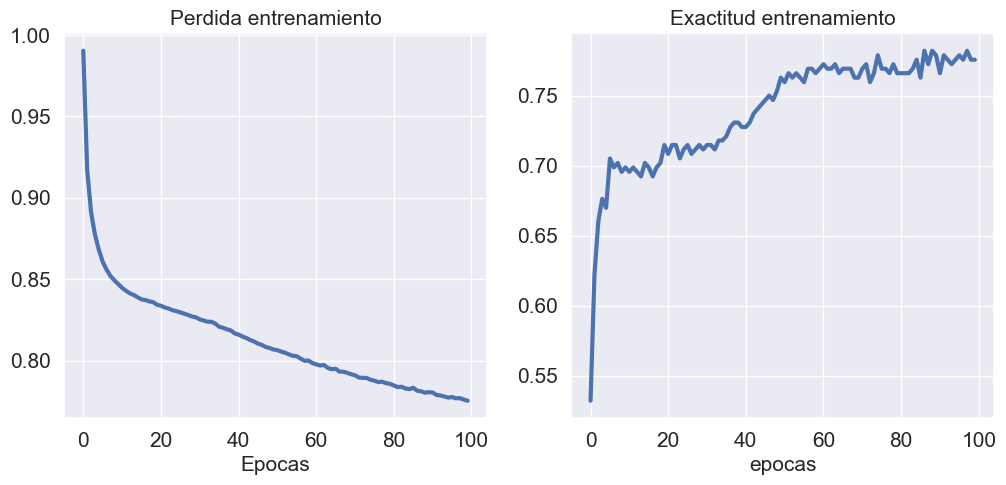

In [21]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Perdida entrenamiento', size=15)
ax.set_xlabel('Epocas', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Exactitud entrenamiento', size=15)
ax.set_xlabel('epocas', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()